

```
# This is formatted as code
```

# กระบวนการ EDA สำหรับข้อมูลข้อความ


* ทำความเข้าใจข้อมูล
* ตรวจสอบความสะอาดของข้อมูล
* สร้างสรุปเชิงสถิติ
* แสดงผลข้อมูล



## ตัวอย่างชุดข้อมูล

* [Twitter Dataset](https://www.kaggle.com/datasets/tungle98/twitter-sentiment-dataset/data): ข้อความสั้น
* [IMDB Reviews](https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews): ข้อความยาว
* [Thai Text Classification Dataset](https://nlpforthai.com/tasks/text-classification/): ข้อความภาษาไทยสำหรับงานจำแนกประเภท
ตัวอย่าง เช่น
   * ข้อความรีวิวจากเว็บขายของออนไลน์แห่งหนึ่ง เมื่อปี 2561 โดยมี 2 tag คือ pos และ neg
   
   https://github.com/PyThaiNLP/thai-sentiment-analysis-dataset/blob/master/review_shopping.csv

## ตัวอย่างการวิเคราะห์ข้อมูล

ข้อมูล [SMSSpamCollection](https://drive.google.com/file/d/1R9d_-NRcVz6jKufxUT-QZdV8vJHm0m6W/view?usp=sharing):
เป็นข้อมูล public set ข้อความ SMS ที่รวมรวบจากงานวิจัยข้อความ spam บนมือถือที่จัดแบ่งเป็น 2 ประเภท คือ spam และไม่ใช่ spam (ham)

ที่มาของข้อมูลจาก [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/228/sms+spam+collection)

### **การทำความเข้าใจข้อมูล**

*   การโหลดและดูข้อมูลเบื้องต้น
*   ตรวจสอบข้อมูลที่ขาดหาย (missing values)
*   ตรวจสอบความซ้ำซ้อนของข้อมูล (duplicate rows)
*   แยกคอลัมน์ข้อความ (text) และเป้าหมาย (target) ถ้ายังไม่แยก


In [ ]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#mount colab drive

from google.colab import drive
drive.mount('/content/drive')

# Replace with filename path
file_path = '/content/drive/MyDrive/sms_spam_collection/SMSSpamCollection'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the data
sms = pd.read_csv(file_path, sep='\t', header=None, names=['label', 'text'])
print(sms.info())
print(sms.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   5572 non-null   object
 1   text    5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB
None
  label                                               text
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
# check total messages
sms.describe()

,label,text
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


อธิบายการแปลผลข้อมูลข้างต้น

*  ทำให้เราเห็นได้ว่ามีการนับcountเห็นได้ว่ามีจำนวน5572 เท่ากันทั้งสองคอลัม
*   บอกจำนวนที่ไม่ซ้ำ
*   top บอกให้เรารู้ว่า ham ซ้ำมากกว่า และซ้ำที่คำว่าอะไรมากที่สุด
*   รายการในลิสต์


In [ ]:
# check missing values
sms.isnull().sum()

,0
label,0
text,0


In [ ]:
# check duplicate and number of messages in each category
sms.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

อธิบายการแปลผลข้อมูลข้างต้น

*
*


In [ ]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


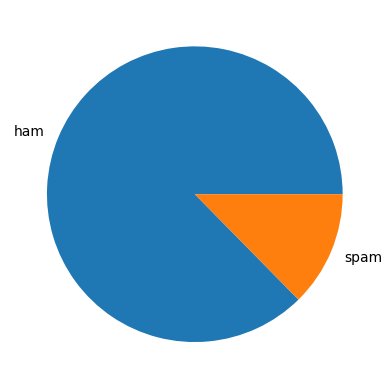

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
sms.groupby('label').size().plot(kind='pie', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)



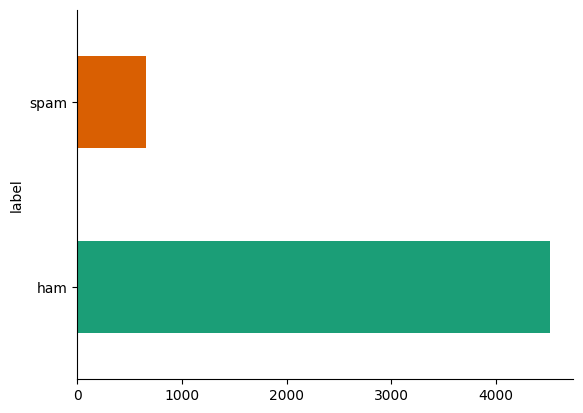

In [ ]:
sms.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

### **ตรวจสอบความสะอาดของข้อมูล**

* ลบข้อมูลทีี่ซ้ำซ้อน
* ลบส่วนที่ไม่จำเป็นต้องใช้ในข้อความ


In [ ]:
# Drop duplicate rows based on all columns
sms = sms.drop_duplicates()

# Display the DataFrame after removing duplicates
sms.head()

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# check and remove special characters
import re

def clean_text(text):
    # ลบ URL
    text = re.sub(r'http\S+', '', text)
    # ลบตัวอักษรพิเศษ ยกเว้นช่องว่าง
    text = re.sub(r'[^\w\s]', '', text)
    # ลบตัวเลข
    text = re.sub(r'\d+', '', text)
    # เปลี่ยนเป็นตัวพิมพ์เล็ก
    text = text.lower()
    # ลบช่องว่างเกิน
    text = text.strip()
    return text

sms['cleaned_text'] = sms['text'].apply(clean_text)

# check data after cleansing
sms[['text', 'cleaned_text']].head()

,text,cleaned_text
0,"Go until jurong point, crazy.. Available only ...",go until jurong point crazy available only in ...
1,Ok lar... Joking wif u oni...,ok lar joking wif u oni
2,Free entry in 2 a wkly comp to win FA Cup fina...,free entry in a wkly comp to win fa cup final...
3,U dun say so early hor... U c already then say...,u dun say so early hor u c already then say
4,"Nah I don't think he goes to usf, he lives aro...",nah i dont think he goes to usf he lives aroun...


In [ ]:
# counting each category
sms['label'].value_counts()

,count
label,
ham,4516
spam,653


### **สร้างสรุปเชิงสถิติ**

In [ ]:
# ตรวจสอบความยาวของข้อความหลังทำความสะอาด
sms['text_length']=sms['cleaned_text'].apply(len)
print(sms['text_length'].describe())
sms[[ 'cleaned_text','text_length', 'label']].head()

count    5169.000000
mean       72.796479
std        53.642020
min         0.000000
25%        33.000000
50%        57.000000
75%       107.000000
max       888.000000
Name: text_length, dtype: float64


,cleaned_text,text_length,label
0,go until jurong point crazy available only in ...,102,ham
1,ok lar joking wif u oni,23,ham
2,free entry in a wkly comp to win fa cup final...,124,spam
3,u dun say so early hor u c already then say,43,ham
4,nah i dont think he goes to usf he lives aroun...,59,ham


count    5169.000000
mean       72.796479
std        53.642020
min         0.000000
25%        33.000000
50%        57.000000
75%       107.000000
max       888.000000
Name: text_length, dtype: float64


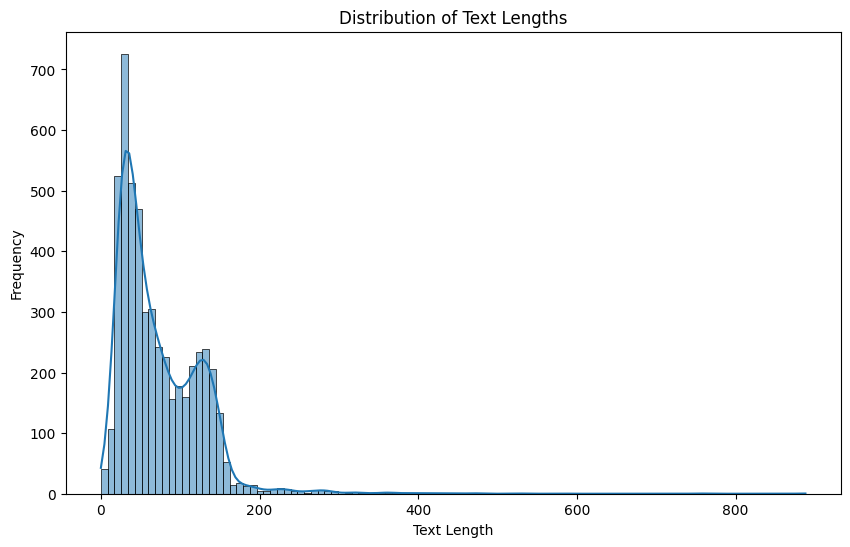

In [ ]:
# ตรวจสอบความยาวของข้อความหลังทำความสะอาด
sms['text_length'] = sms['cleaned_text'].apply(len)
print(sms['text_length'].describe())


# แสดงกราฟความยาวของข้อความ
plt.figure(figsize=(10, 6))
sns.histplot(sms['text_length'], kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

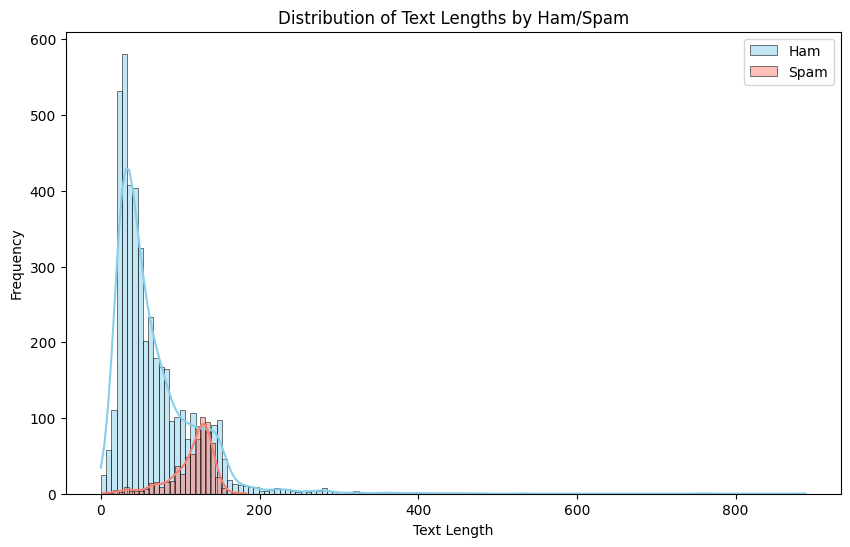

In [ ]:
# prompt: frequency graph of text length between ham and spam

plt.figure(figsize=(10, 6))
sns.histplot(sms[sms['label'] == 'ham']['text_length'], kde=True, label='Ham', color='skyblue')
sns.histplot(sms[sms['label'] == 'spam']['text_length'], kde=True, label='Spam', color='salmon')
plt.title('Distribution of Text Lengths by Ham/Spam')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [ ]:
sms[sms.label=='spam'].describe()

,label_num,text_length
count,653.0,653.000000
mean,1.0,115.275651
std,0.0,27.328618
min,1.0,3.000000
25%,1.0,105.000000
50%,1.0,123.000000
75%,1.0,133.000000
max,1.0,183.000000


In [ ]:
sms[sms.label=='ham'].describe()

,label_num,text_length
count,4516.0,4516.000000
mean,0.0,66.654119
std,0.0,53.731397
min,0.0,0.000000
25%,0.0,31.000000
50%,0.0,50.000000
75%,0.0,86.000000
max,0.0,888.000000


In [ ]:
# the longest sms
sms[sms.text_length == 888].cleaned_text.iloc[0]

'for me the love should start with attractioni should feel that i need her every time around meshe should be the first thing which comes in my thoughtsi would start the day and end it with hershe should be there every time i dreamlove will be then when my every breath has her namemy life should happen around hermy life will be named to heri would cry for herwill give all my happiness and take all her sorrowsi will be ready to fight with anyone for heri will be in love when i will be doing the craziest things for herlove will be when i dont have to proove anyone that my girl is the most beautiful lady on the whole planeti will always be singing praises for herlove will be when i start up making chicken curry and end up makiing sambarlife will be the most beautiful thenwill get every morning and thank god for the day because she is with mei would like to say a lotwill tell later'

In [ ]:
sms[sms.text_length == 0].cleaned_text

,cleaned_text
1612,
3376,
4824,


In [ ]:
sms[sms.text_length == 3].cleaned_text

,cleaned_text
261,yup
2508,yup
3742,tfp
4293,gwr


In [ ]:
#เพิ่มโค้ด พิมพ์จำนวนข้อความที่มีความยาวตั้งแต่400ขั้นไป
#ตัดข้อความที่เป็น outlier ทิ้ง เช่น ความยาว 0 และ ความยาวตั้งแต่ xxx ตัวขึ้นไป

In [ ]:
from collections import Counter

words = sms[sms.label=='ham'].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
ham_words = Counter()

for msg in words:
    ham_words.update(msg)

print(ham_words.most_common(50))

[('i', 2083), ('you', 1777), ('to', 1481), ('the', 1059), ('a', 973), ('u', 903), ('and', 819), ('in', 757), ('me', 717), ('my', 673), ('is', 652), ('it', 549), ('for', 481), ('of', 478), ('that', 474), ('im', 448), ('have', 424), ('but', 406), ('so', 400), ('are', 393), ('not', 384), ('your', 378), ('on', 370), ('at', 361), ('can', 358), ('do', 344), ('be', 324), ('if', 315), ('will', 313), ('get', 297), ('its', 287), ('we', 287), ('up', 284), ('just', 275), ('now', 271), ('dont', 259), ('when', 255), ('how', 254), ('ltgt', 254), ('no', 253), ('with', 248), ('ok', 247), ('go', 244), ('what', 235), ('got', 227), ('this', 227), ('all', 225), ('like', 221), ('know', 221), ('or', 221)]


In [ ]:
words = sms[sms.label=='spam'].cleaned_text.apply(lambda x: [word.lower() for word in x.split()])
spam_words = Counter()

for msg in words:
    spam_words.update(msg)

print(spam_words.most_common(50))

[('to', 597), ('a', 335), ('call', 306), ('you', 259), ('your', 241), ('free', 190), ('for', 185), ('the', 181), ('now', 157), ('or', 157), ('is', 144), ('u', 130), ('txt', 126), ('on', 122), ('from', 120), ('ur', 119), ('have', 115), ('stop', 108), ('mobile', 106), ('text', 104), ('and', 104), ('claim', 96), ('with', 94), ('reply', 93), ('of', 82), ('prize', 81), ('this', 81), ('our', 77), ('only', 70), ('are', 69), ('get', 69), ('just', 67), ('no', 66), ('p', 65), ('new', 64), ('in', 63), ('won', 59), ('send', 58), ('urgent', 58), ('nokia', 57), ('cash', 51), ('contact', 51), ('please', 49), ('out', 49), ('i', 49), ('win', 48), ('service', 48), ('we', 46), ('be', 45), ('phone', 44)]


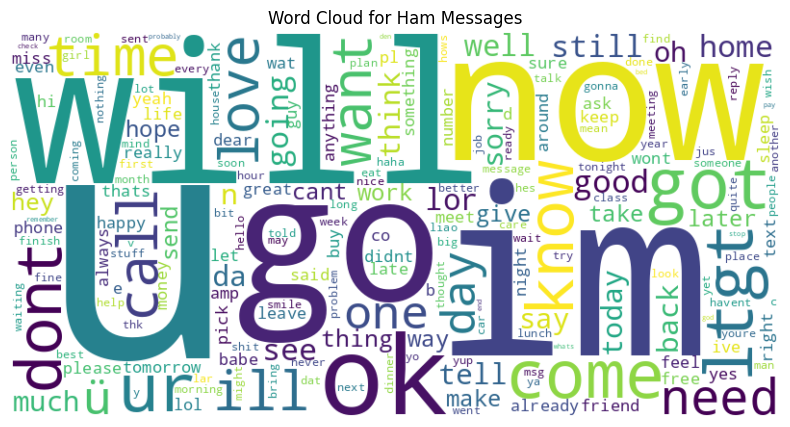

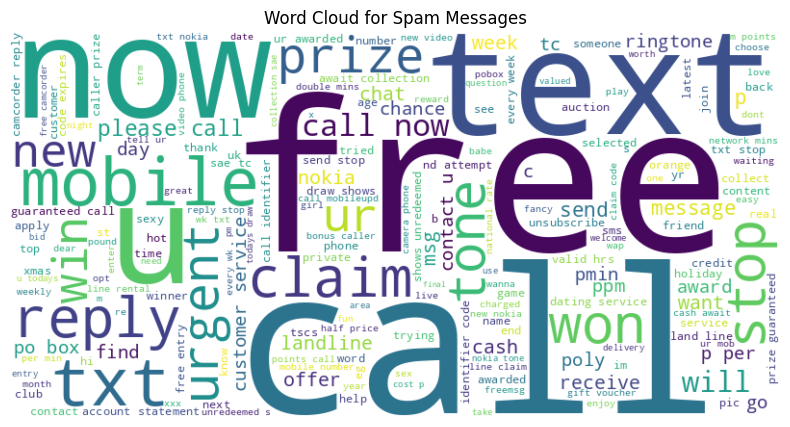

In [ ]:
# prompt: word cloud for sms[sms.label=='ham']
# and sms[sms.label=='spam']

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create wordcloud for ham messages
ham_text = ' '.join(sms[sms.label == 'ham']['cleaned_text'].astype(str))
ham_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.figure(figsize=(10, 5))
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Ham Messages')
plt.show()

# Create wordcloud for spam messages
spam_text = ' '.join(sms[sms.label == 'spam']['cleaned_text'].astype(str))
spam_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.figure(figsize=(10, 5))
plt.imshow(spam_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Spam Messages')
plt.show()

In [ ]:
from nltk.util import ngrams

bigrams = list(ngrams(' '.join(sms['cleaned_,.................text']).split(), 2))
print(Counter(bigrams).most_common(10))

KeyError: 'cleaned_,.................text'

### ทดลองทำ

* เลือก dataset
* ทดลองโหลดและตรวจสอบข้อมูลข้อความ
* สรุปสถิติเบื้องต้น
* สร้าง Word Cloud และวิเคราะห์คำที่พบบ่อย
* แบ่งกลุ่มทำ N-grams และเปรียบเทียบคำที่พบบ่อยในแต่ละกลุ่ม nltk libary

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Replace with filename path
file_path = '/content/drive/MyDrive/sms_spam_collection/SMSSpamCollection'